# Descriptive Analysis

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
from scipy import stats


import psutil
import warnings
from sinfo import sinfo

warnings.filterwarnings("ignore")
plt.rcdefaults()

In [2]:
# Storing path
path = Path("../data/ifood_cleaned.csv")

# Read CSV with pandas
data = pd.read_csv(path)

# Read columns dtypes
with open('../data/cleaned_dtypes.json', 'r') as f:
    data_types = json.load(f)

data = data.astype(data_types)

In [3]:
# standardizing int dtype

for col in data.columns:
    if data[col].dtype == "int64":
        data[col] = data[col].astype("Int64")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2205 non-null   Int64          
 1   Year_Birth           2205 non-null   Int64          
 2   Year_Old             2205 non-null   Int64          
 3   CustomerFor          2205 non-null   timedelta64[ns]
 4   Dt_Customer          2205 non-null   datetime64[ns] 
 5   Education            2205 non-null   category       
 6   Marital_Status       2205 non-null   category       
 7   Income               2205 non-null   Int64          
 8   Kidhome              2205 non-null   Int64          
 9   Teenhome             2205 non-null   Int64          
 10  ChildrenHome         2205 non-null   Int64          
 11  Recency              2205 non-null   Int64          
 12  MntSpentTotal        2205 non-null   Int64          
 13  MntWines          

In [4]:
data["MntTotal_cat"], intervals = pd.cut(data["MntSpentTotal"], 6, 
                                         precision=0, retbins=True)

temp, first_int = pd.cut(np.arange(2, 426), 5, retbins=True)
bins = list(first_int) + list(intervals[2:])

data["MntTotal_cat"], intervals = pd.cut(data["MntSpentTotal"], bins, 
                                         precision=0, right=False, 
                                         retbins=True, ordered=True)

In [5]:
data["Recency_cat"] = data["Recency_cat"].cat.as_ordered()
data["Age_cat"] = data["Age_cat"].cat.as_ordered()

data["Education"] = data["Education"].cat.reorder_categories(["Basic", 
                                                              "Graduation", 
                                                              "2n Cycle", 
                                                              "Master", 
                                                              "PhD"], 
                                                              ordered=True)

data["Income_cat"] = data["Income_cat"].cat\
    .reorder_categories(['D1', 'D2', 'D3', 'D4', 'D5', 
                         'D6', 'D7', 'D10'], ordered=True)

## Categorical Variables

### Frequencies

In [6]:
frec_abs = data["Marital_Status"].value_counts()
frec_rel = frec_abs / len(data["Marital_Status"])
frec_per = 100 * frec_rel

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])

frec_tab

,frec_abs,frec_rel,frec_per
Marital_Status,,,
Married,857,0.388662,38.866213
Together,571,0.258957,25.895692
Single,470,0.213152,21.315193
Divorced,231,0.104762,10.476190
Widow,76,0.034467,3.446712


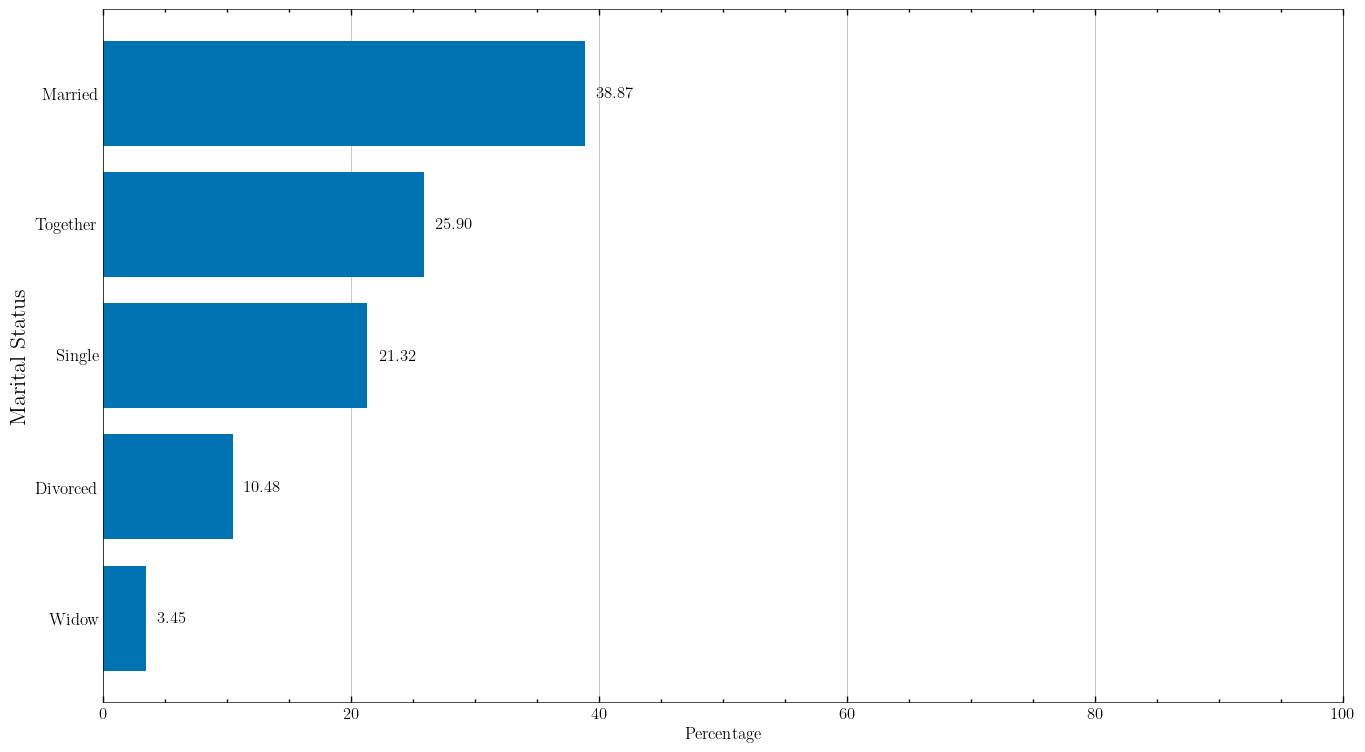

In [7]:
with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/hbars.mplstyle"]):
    fig, ax = plt.subplots()

    hbars = ax.barh(frec_tab.index, frec_tab["frec_per"], 
                    align="center")

    ax.set_ylabel("Marital Status", fontsize=16);
    ax.set_xlabel("Percentage", fontsize=12);

    ax.invert_yaxis();
    ax.bar_label(hbars, padding=8, fmt='%.2f');
    ax.set_xlim(0,100);
    plt.show()

In [8]:
frec_abs = data["Education"].value_counts().sort_index()
frec_abs_acc = data["Education"].value_counts().sort_index().cumsum()

frec_rel = (frec_abs / len(data["Education"])).round(4)
frec_rel_acc = (frec_abs / len(data["Education"])).cumsum().round(4)

frec_per = 100 * frec_rel
frec_per_acc = (100 * frec_rel).cumsum()

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])
frec_acc = pd.concat([frec_abs_acc, frec_rel_acc, frec_per_acc], axis=1,
                     keys=["frec_abs_acc", "frec_rel_acc", "frec_per_acc"])
frec_tab = pd.concat([frec_tab, frec_acc], axis=1)

frec_tab

,frec_abs,frec_rel,frec_per,frec_abs_acc,frec_rel_acc,frec_per_acc
Education,,,,,,
Basic,54,0.0245,2.45,54,0.0245,2.45
Graduation,1113,0.5048,50.48,1167,0.5293,52.93
2n Cycle,198,0.0898,8.98,1365,0.6190,61.91
Master,363,0.1646,16.46,1728,0.7837,78.37
PhD,477,0.2163,21.63,2205,1.0000,100.00


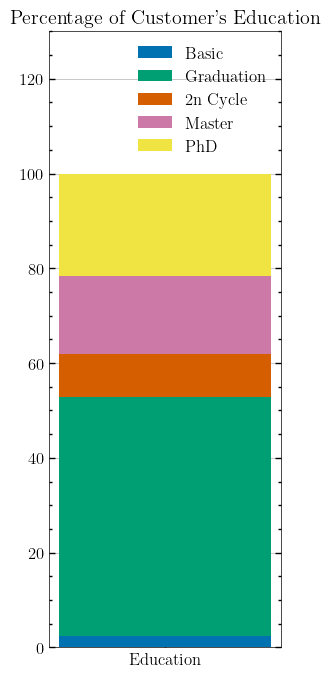

In [9]:
with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/vbars.mplstyle"]):

    width = 0.2
    label = "Education"
    fig, ax = plt.subplots(figsize=(3,8))
    bottom = np.zeros(1)

    for boolean, values in frec_tab["frec_per"].items():
        p = ax.bar(label, values, width, label=boolean, bottom=bottom)
        bottom += values

    ax.set_title("Percentage of Customer's Education")
    ax.legend(loc="upper right")
    ax.set_ylim(0,130)

    plt.show()

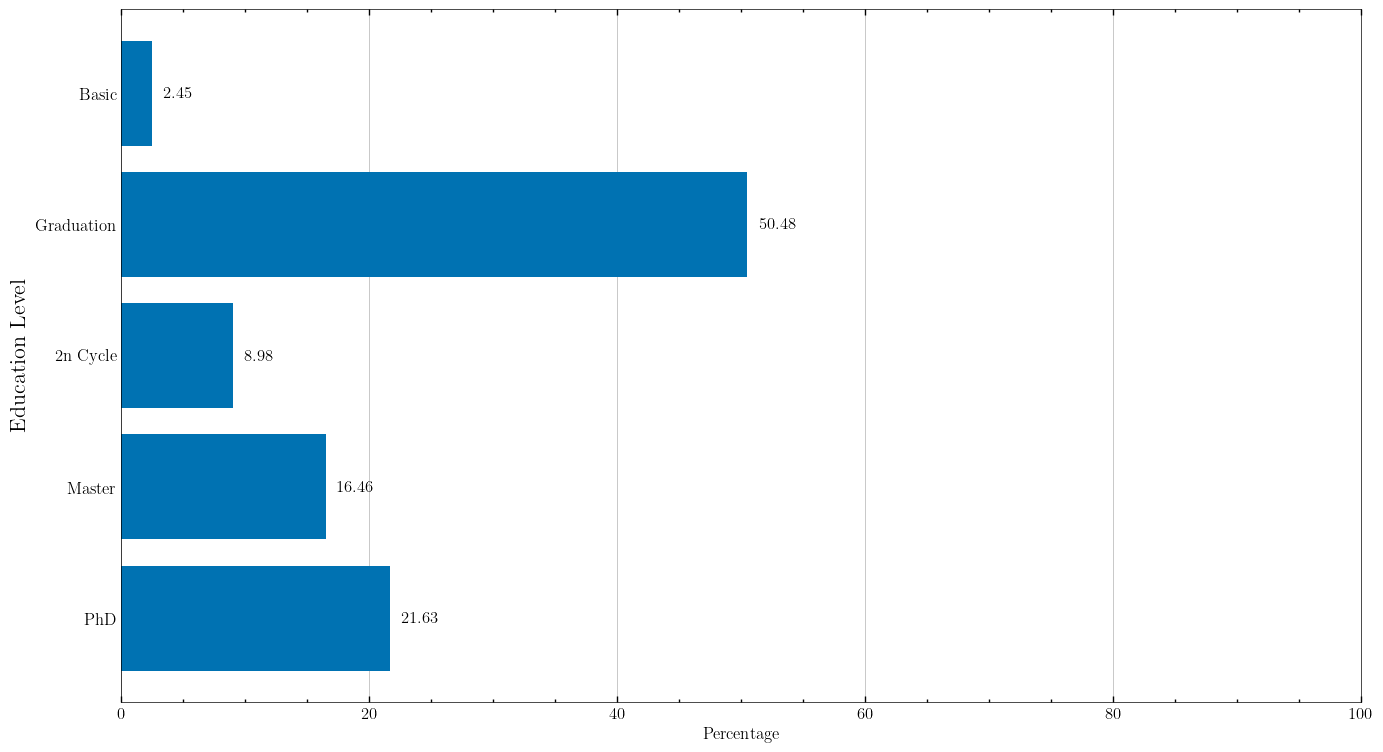

In [10]:
with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/hbars.mplstyle"]):

    fig, ax = plt.subplots()

    hbars = ax.barh(frec_tab.index, frec_tab["frec_per"], 
                    align="center")

    ax.set_ylabel("Education Level", fontsize=16);
    ax.set_xlabel("Percentage", fontsize=12);

    ax.invert_yaxis();
    ax.bar_label(hbars, padding=8, fmt='%.2f');
    ax.set_xlim(0,100);
    plt.show()

In [11]:
frec_abs = data["Age_cat"].value_counts().sort_index()
frec_abs_acc = data["Age_cat"].value_counts().sort_index().cumsum()

frec_rel = (frec_abs / len(data["Age_cat"])).round(4)
frec_rel_acc = (frec_abs / len(data["Age_cat"])).cumsum().round(4)

frec_per = 100 * frec_rel
frec_per_acc = (100 * frec_rel).cumsum()

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])
frec_acc = pd.concat([frec_abs_acc, frec_rel_acc, frec_per_acc], axis=1,
                     keys=["frec_abs_acc", "frec_rel_acc", "frec_per_acc"])
frec_tab = pd.concat([frec_tab, frec_acc], axis=1)

frec_tab

,frec_abs,frec_rel,frec_per,frec_abs_acc,frec_rel_acc,frec_per_acc
Age_cat,,,,,,
25_34,60,0.0272,2.72,60,0.0272,2.72
35_44,357,0.1619,16.19,417,0.1891,18.91
45_54,729,0.3306,33.06,1146,0.5197,51.97
55_64,502,0.2277,22.77,1648,0.7474,74.74
65_74,451,0.2045,20.45,2099,0.9519,95.19
75_above,106,0.0481,4.81,2205,1.0000,100.00


In [12]:
frec_abs = data["Income_cat"].value_counts().sort_index()
frec_abs_acc = data["Income_cat"].value_counts().sort_index().cumsum()

frec_rel = (frec_abs / len(data["Income_cat"])).round(4)
frec_rel_acc = (frec_abs / len(data["Income_cat"])).cumsum().round(4)

frec_per = 100 * frec_rel
frec_per_acc = (100 * frec_rel).cumsum()

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])
frec_acc = pd.concat([frec_abs_acc, frec_rel_acc, frec_per_acc], axis=1,
                     keys=["frec_abs_acc", "frec_rel_acc", "frec_per_acc"])
frec_tab = pd.concat([frec_tab, frec_acc], axis=1)

frec_tab

,frec_abs,frec_rel,frec_per,frec_abs_acc,frec_rel_acc,frec_per_acc
Income_cat,,,,,,
D1,90,0.0408,4.08,90,0.0408,4.08
D2,410,0.1859,18.59,500,0.2268,22.67
D3,553,0.2508,25.08,1053,0.4776,47.75
D4,525,0.2381,23.81,1578,0.7156,71.56
D5,471,0.2136,21.36,2049,0.9293,92.92
D6,142,0.0644,6.44,2191,0.9937,99.36
D7,7,0.0032,0.32,2198,0.9968,99.68
D10,7,0.0032,0.32,2205,1.0000,100.00


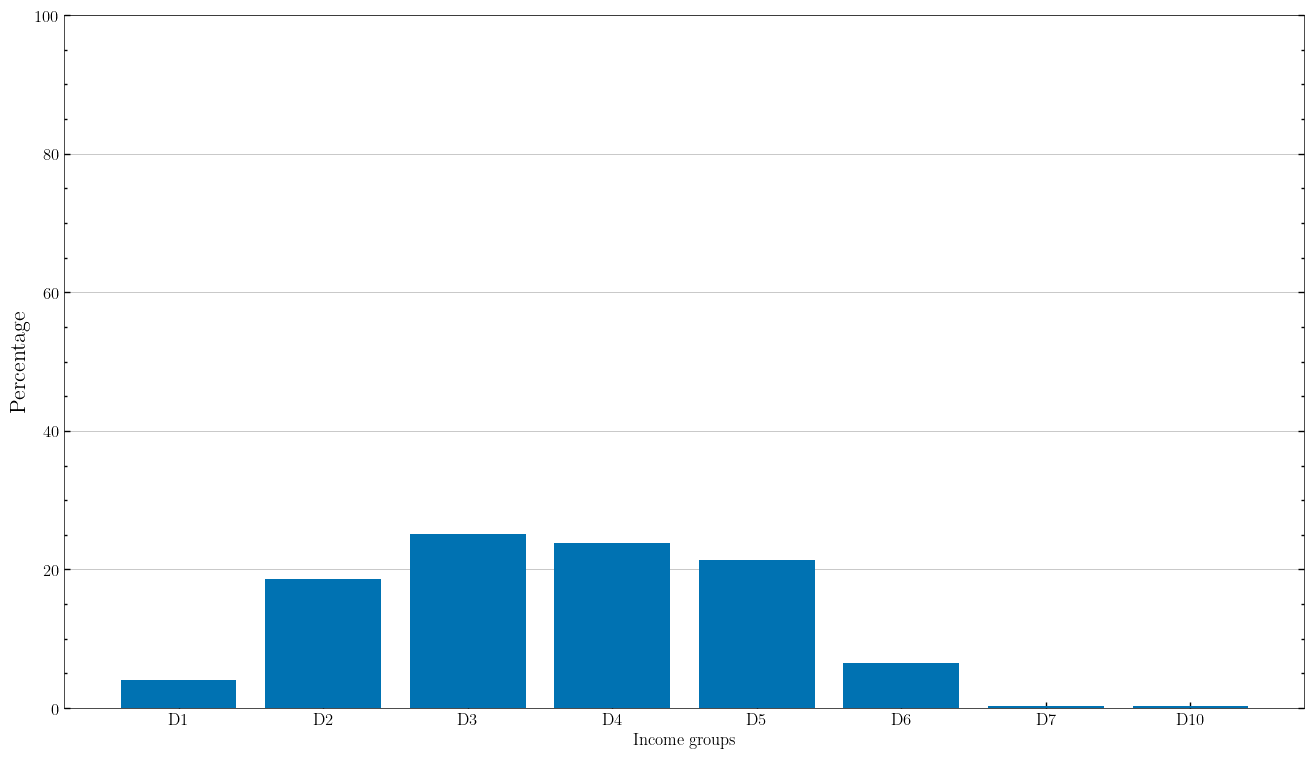

In [13]:
with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/vbars.mplstyle"]):

    fig, ax = plt.subplots()

    bars = ax.bar(frec_tab.index, frec_tab["frec_per"], 
                    align="center")

    ax.set_ylabel("Percentage", fontsize=16);
    ax.set_xlabel("Income groups", fontsize=12);

    ax.set_ylim(0,100);
    plt.show()

In [14]:
frec_abs = data["MntTotal_cat"].value_counts().sort_index()
frec_abs_acc = data["MntTotal_cat"].value_counts().sort_index().cumsum()

frec_rel = (frec_abs / len(data["MntTotal_cat"])).round(4)
frec_rel_acc = (frec_abs / len(data["MntTotal_cat"])).cumsum().round(4)

frec_per = 100 * frec_rel
frec_per_acc = (100 * frec_rel).cumsum()

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])
frec_acc = pd.concat([frec_abs_acc, frec_rel_acc, frec_per_acc], axis=1,
                     keys=["frec_abs_acc", "frec_rel_acc", "frec_per_acc"])
frec_tab = pd.concat([frec_tab, frec_acc], axis=1)

frec_tab

,frec_abs,frec_rel,frec_per,frec_abs_acc,frec_rel_acc,frec_per_acc
MntTotal_cat,,,,,,
"[2.0, 87.0)",646,0.2930,29.30,646,0.2930,29.30
"[87.0, 171.0)",196,0.0889,8.89,842,0.3819,38.19
"[171.0, 256.0)",105,0.0476,4.76,947,0.4295,42.95
"[256.0, 340.0)",109,0.0494,4.94,1056,0.4789,47.89
"[340.0, 425.0)",88,0.0399,3.99,1144,0.5188,51.88
"[425.0, 845.0)",333,0.1510,15.10,1477,0.6698,66.98
"[845.0, 1265.0)",353,0.1601,16.01,1830,0.8299,82.99
"[1265.0, 1685.0)",230,0.1043,10.43,2060,0.9342,93.42
"[1685.0, 2105.0)",117,0.0531,5.31,2177,0.9873,98.73


In [15]:
frec_abs = data["Recency_cat"].value_counts().sort_index()
frec_abs_acc = data["Recency_cat"].value_counts().sort_index().cumsum()

frec_rel = (frec_abs / len(data["Recency_cat"])).round(4)
frec_rel_acc = (frec_abs / len(data["Recency_cat"])).cumsum().round(4)

frec_per = 100 * frec_rel
frec_per_acc = (100 * frec_rel).cumsum()

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])
frec_acc = pd.concat([frec_abs_acc, frec_rel_acc, frec_per_acc], axis=1,
                     keys=["frec_abs_acc", "frec_rel_acc", "frec_per_acc"])
frec_tab = pd.concat([frec_tab, frec_acc], axis=1)

frec_tab

,frec_abs,frec_rel,frec_per,frec_abs_acc,frec_rel_acc,frec_per_acc
Recency_cat,,,,,,
0_24,557,0.2526,25.26,557,0.2526,25.26
25_49,547,0.2481,24.81,1104,0.5007,50.07
50_74,561,0.2544,25.44,1665,0.7551,75.51
75_99,540,0.2449,24.49,2205,1.0000,100.00


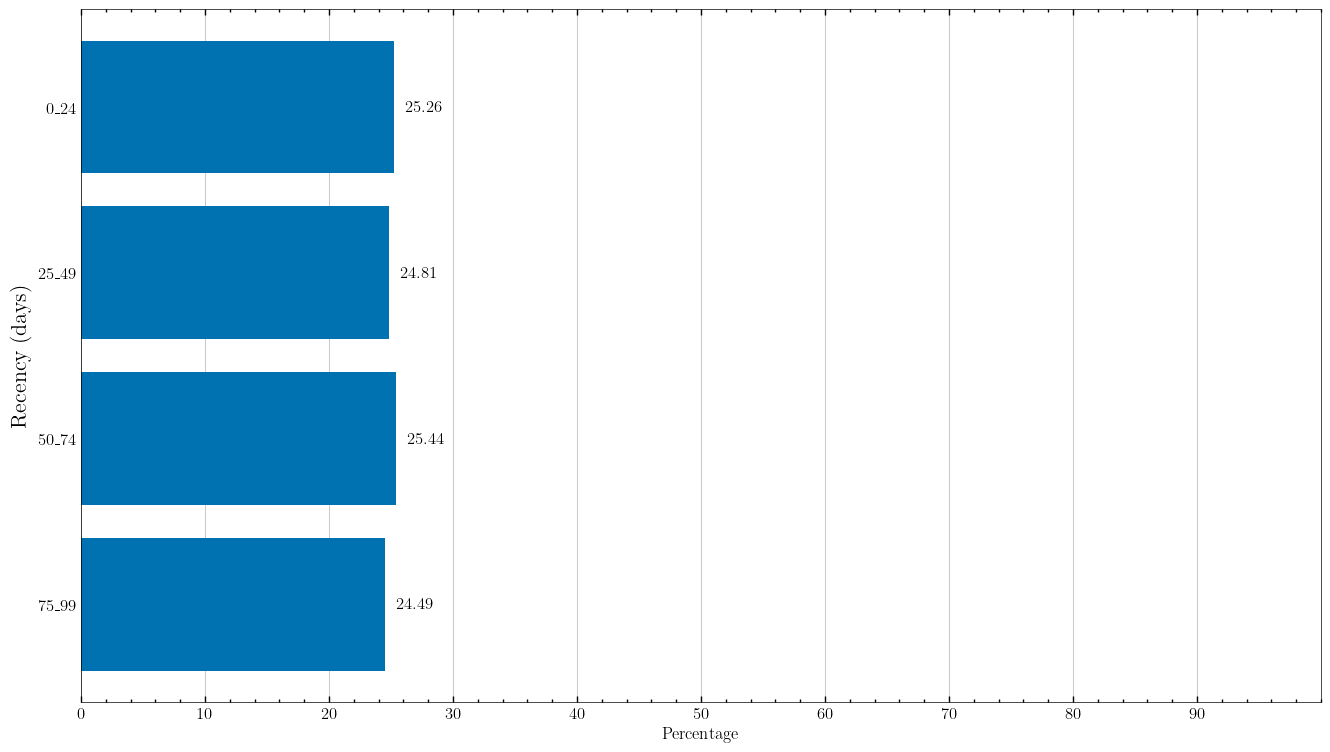

In [16]:
with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/hbars.mplstyle"]):

    fig, ax = plt.subplots()

    hbars = ax.barh(frec_tab.index, frec_tab["frec_per"], 
                    align="center")

    ax.set_ylabel("Recency (days)", fontsize=16);
    ax.set_xlabel("Percentage", fontsize=12);

    ax.invert_yaxis();
    ax.bar_label(hbars, padding=8, fmt='%.2f');
    ax.set_xticks(np.arange(0,100,10))
    ax.set_xlim(0,100);
    plt.show()

In [17]:
accp_cmp1 = data["AcceptedCmp1"].value_counts()
accp_cmp2 = data["AcceptedCmp2"].value_counts()
accp_cmp3 = data["AcceptedCmp3"].value_counts()
accp_cmp4 = data["AcceptedCmp4"].value_counts()
accp_cmp5 = data["AcceptedCmp5"].value_counts()

frec_abs = pd.concat([accp_cmp1, accp_cmp2, accp_cmp3, accp_cmp4, accp_cmp5],
                     keys=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", 
                           "AcceptedCmp4", "AcceptedCmp5"])

frec_abs.index.names = ["Campaign", "Acceptance"]
frec_abs = pd.DataFrame(frec_abs)
frec_abs.columns = ["Frequencies"]

In [18]:
frec_rel = (frec_abs["Frequencies"] / len(data["ID"])).round(4)
frec_per = 100 * frec_rel

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["Absolute", "Relative", "Percentage"])

frec_tab.columns.names = ["Frequencies", "drop"]
frec_tab = frec_tab.droplevel(level="drop", axis=1)
frec_tab

Frequencies              Absolute  Relative  Percentage
Campaign     Acceptance                                
AcceptedCmp1 0               2064    0.9361       93.61
             1                141    0.0639        6.39
AcceptedCmp2 0               2175    0.9864       98.64
             1                 30    0.0136        1.36
AcceptedCmp3 0               2043    0.9265       92.65
             1                162    0.0735        7.35
AcceptedCmp4 0               2041    0.9256       92.56
             1                164    0.0744        7.44
AcceptedCmp5 0               2045    0.9274       92.74
             1                160    0.0726        7.26

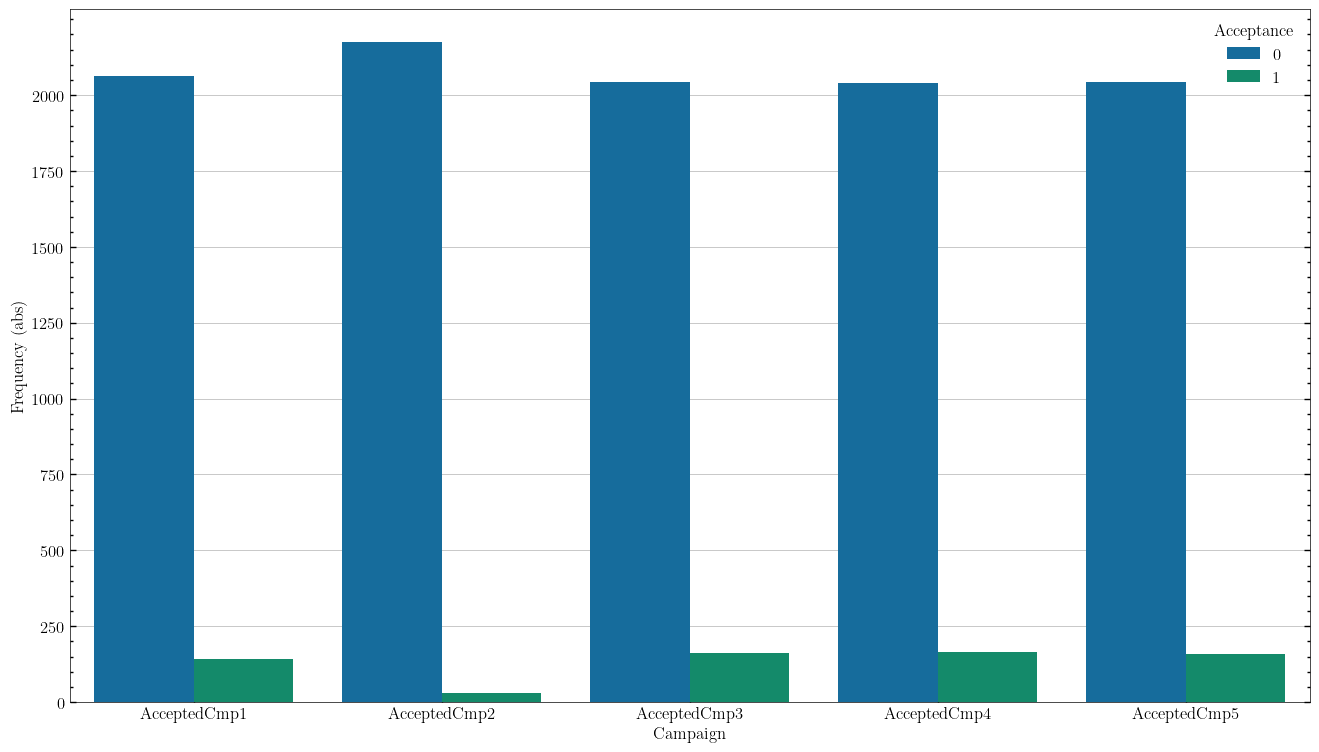

In [19]:
with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/vbars.mplstyle"]):

    bar = sns.barplot(x="Campaign", y="Absolute", hue="Acceptance",
                      data=frec_tab)
    bar.set_ylabel("Frequency (abs)")
    bar.set_yticks(np.arange(0,2250,250))
    plt.show();

### Cuantitative Variables

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2205 non-null   Int64          
 1   Year_Birth           2205 non-null   Int64          
 2   Year_Old             2205 non-null   Int64          
 3   CustomerFor          2205 non-null   timedelta64[ns]
 4   Dt_Customer          2205 non-null   datetime64[ns] 
 5   Education            2205 non-null   category       
 6   Marital_Status       2205 non-null   category       
 7   Income               2205 non-null   Int64          
 8   Kidhome              2205 non-null   Int64          
 9   Teenhome             2205 non-null   Int64          
 10  ChildrenHome         2205 non-null   Int64          
 11  Recency              2205 non-null   Int64          
 12  MntSpentTotal        2205 non-null   Int64          
 13  MntWines          

In [21]:
# KS-Test integer columns

int_cols = ["Year_Old", "Income", "Recency", "MntSpentTotal", "MntWines", 
            "MntFruits", "MntMeatProducts", "MntFishProducts",
            "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", 
            "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",
            "ChildrenHome"]

def ksfunc(col):
    return stats.kstest(col, stats.norm.cdf,
                        args=(col.mean(), col.std()))

results = data[int_cols].apply(ksfunc)

results = results.T
results = results.applymap(lambda x: f"{x:.4f}")
results.columns = ["Statistic", "p-Value"]
results.columns.names = ["KS-Test"]
results.index.names = ["int_cols"]

results

KS-Test,Statistic,p-Value
int_cols,,
Year_Old,0.0572,0.0000
Income,0.0455,0.0002
Recency,0.0685,0.0000
MntSpentTotal,0.1589,0.0000
MntWines,0.1829,0.0000
MntFruits,0.2539,0.0000
MntMeatProducts,0.2290,0.0000
MntFishProducts,0.2457,0.0000
MntSweetProducts,0.2551,0.0000


In [22]:
def range(col):
    return col.max() - col.min()

def cdv(col):
    """
        Coefficient of Variation Centered on the Mean.
        ---
        (std / mean) * 100
        ---
        Reasonable dispersion is associated with coefficients of variation 
        less than 50. Coefficients of variation greater than 50 indicate a 
        lot of dispersion. Coefficients greater than 100 are generally 
        indicative of strong anomalies in the data.
    """
    return (col.std() / abs(col.mean())) * 100

def trimean(series):
    """
        BESA (best easy systematic average)
        ---
        (Q1 + 2*Q2 + Q3) / 4
        ---
        Highly robust central tendency statistic
    """
    Q1 = series.quantile(0.25)
    median = series.median()
    Q3 = series.quantile(0.75)
    return (Q1 + 2 * median + Q3) / 4

results = data[int_cols].agg(["mean", "median", trimean, 
                              #stats.median_abs_deviation,
                              "std", cdv,
                              range, "min", "max"])

skew = data[int_cols].agg(stats.skew, bias=False)
kurt = data[int_cols].agg(stats.kurtosis, bias=False)
skew_kurt = pd.concat([skew, kurt], axis=1)
skew_kurt.columns = ["skew", "kurt"]

results = results.T

results = pd.concat([results, skew_kurt], axis=1)
results["skew/std"] = (results["skew"] / results["std"])
results["kurt/std"] = (results["kurt"] / results["std"])
"""
    If the result is between -2 and 2, the distribution can be assumed to 
    be symmetric (or meso-kurtic); if it is greater than 2, the distribution 
    can be said to be positively skewed (or leptokurtic); and if it is 
    less than -2, the distribution can be said to be 
    negatively skewed (or platykurtic).
"""

results = results.map(lambda x: f"{x:.2f}")

results.columns.names = ["Descriptive Stats"]
results.index.names = ["int_cols"]

results

Descriptive Stats,mean,median,trimean,std,cdv,range,min,max,skew,kurt,skew/std,kurt/std
int_cols,,,,,,,,,,,,
Year_Old,55.10,54.00,55.00,11.70,21.23,56.00,28.00,84.00,0.10,-0.80,0.01,-0.07
Income,51954.62,51373.00,51607.25,21544.43,41.47,160667.00,1730.00,162397.00,0.35,0.72,0.00,0.00
Recency,49.08,49.00,49.00,28.94,58.97,99.00,0.00,99.00,-0.00,-1.20,-0.00,-0.04
MntSpentTotal,607.38,396.00,477.25,602.97,99.27,2520.00,5.00,2525.00,0.86,-0.35,0.00,-0.00
MntWines,305.39,174.00,219.25,337.68,110.57,1493.00,0.00,1493.00,1.17,0.58,0.00,0.00
MntFruits,26.33,8.00,12.75,39.75,150.98,199.00,0.00,199.00,2.11,4.08,0.05,0.10
MntMeatProducts,167.20,68.00,96.25,224.41,134.22,1725.00,0.00,1725.00,2.03,5.06,0.01,0.02
MntFishProducts,37.57,12.00,19.25,54.60,145.35,259.00,0.00,259.00,1.92,3.10,0.04,0.06
MntSweetProducts,27.09,8.00,12.50,41.13,151.82,262.00,0.00,262.00,2.10,4.09,0.05,0.10


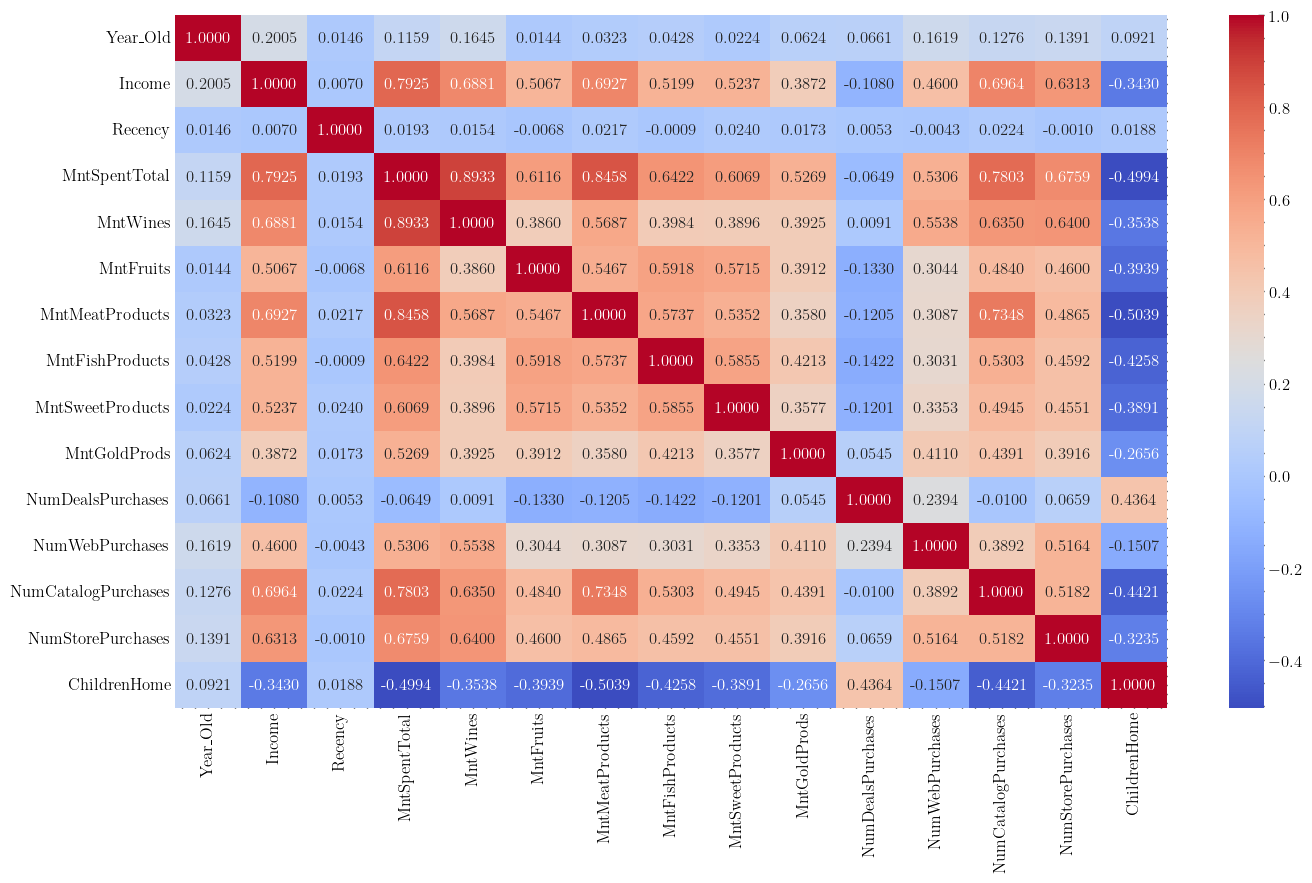

In [36]:
corr_matrix = data[int_cols].corr()

with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/scatter.mplstyle",
                   ]):
    
    sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".4f")
    plt.show()

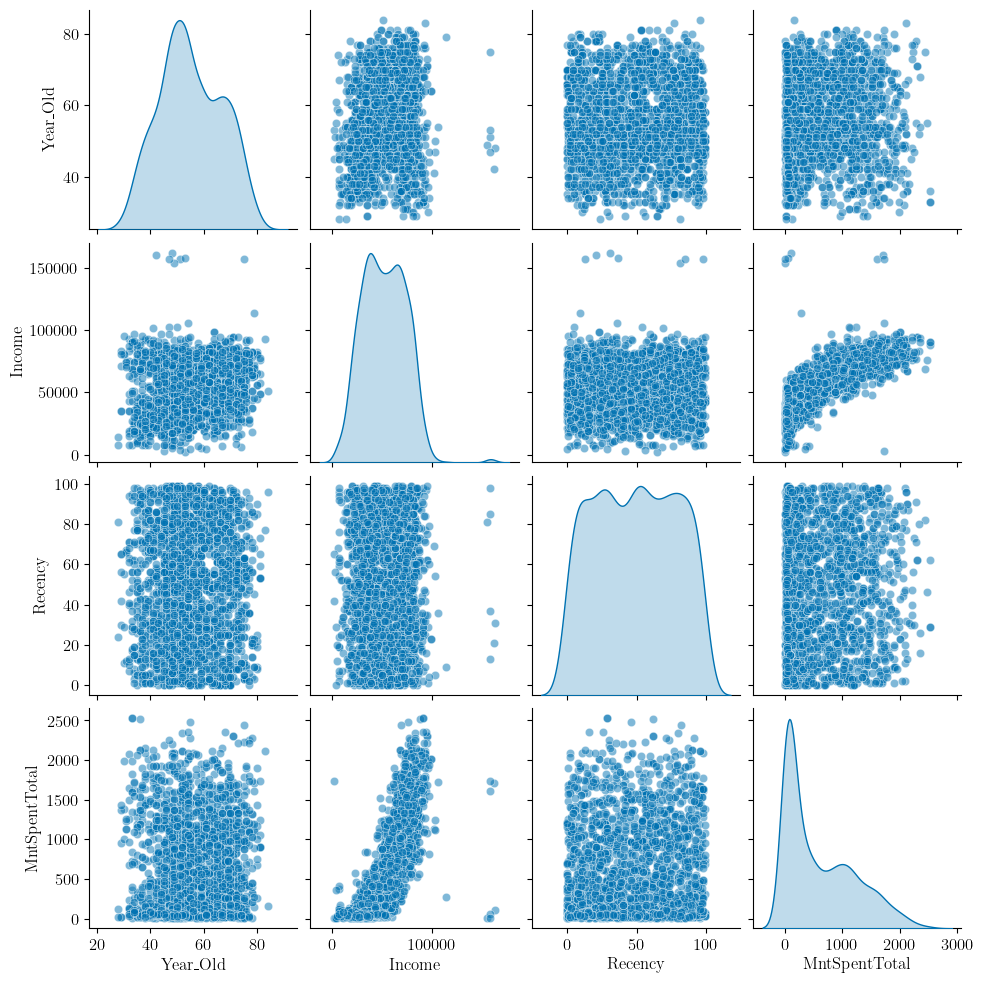

In [24]:
with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   #"./mplstyle/hbars.mplstyle",
                   ]):
    
    plot = sns.pairplot(data[int_cols[:4]], 
                        diag_kind="kde", 
                        plot_kws={"alpha":0.5});
    plt.show();

Pearson Correlation between 'MntSpentTotal' and 'Income'. 
	r = 0.7925


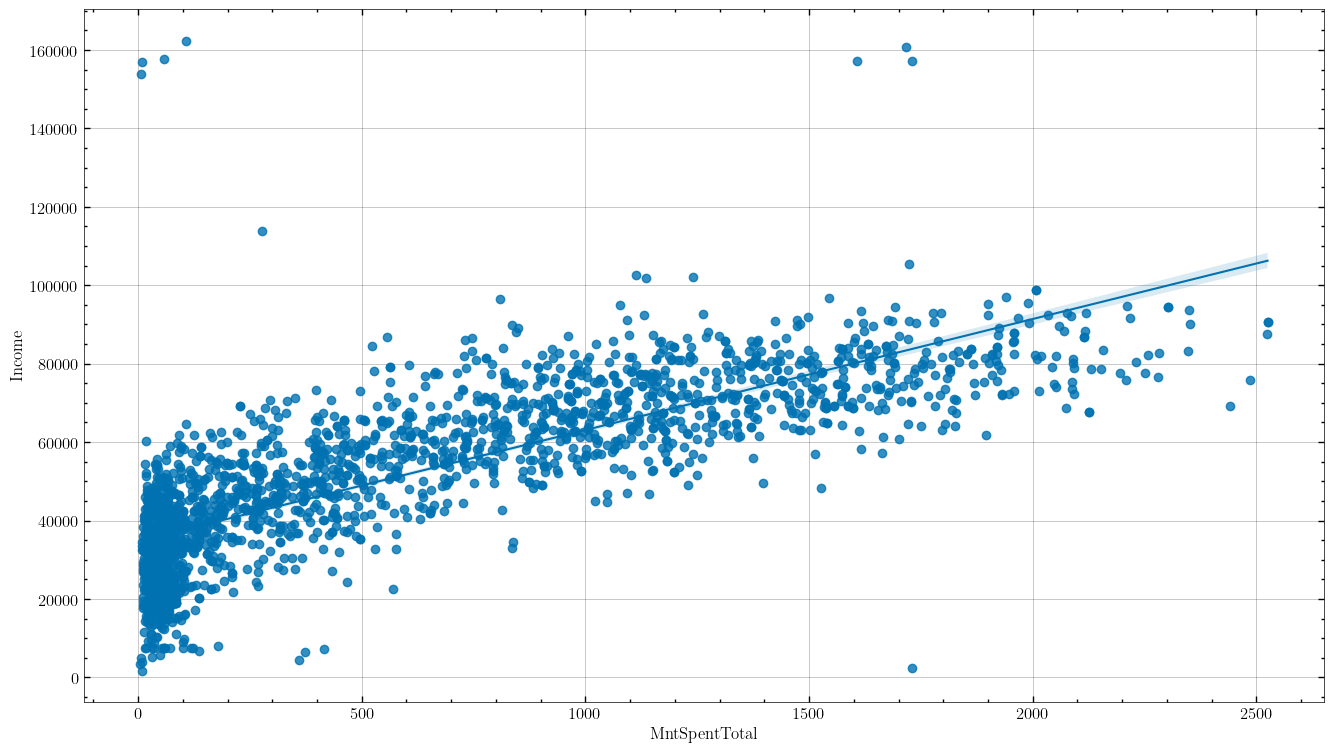

In [25]:
corr_coef, p_value = stats.pearsonr(data["MntSpentTotal"], data["Income"])
print(f"Pearson Correlation between 'MntSpentTotal' and 'Income'. ",
      f"\n\tr = {corr_coef:.4f}", sep=''
      )

with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/scatter.mplstyle",
                   ]):

    plot = sns.regplot(x="MntSpentTotal", y="Income", data=data)
    plt.show();

In [26]:
grouped = data["MntSpentTotal"].groupby(data["Age_cat"])

temp = grouped.agg(["mean", "median", "std", cdv, "min", "max"])
temp.columns.names = ["MntSpentTotal"]
temp = temp.map(lambda x: f"{x:.2f}")
temp

MntSpentTotal,mean,median,std,cdv,min,max
Age_cat,,,,,,
25_34,803.82,701.00,744.70,92.65,14.00,2525.00
35_44,534.34,156.00,638.64,119.52,10.00,2524.00
45_54,523.93,246.00,583.73,111.41,5.00,2349.00
55_64,624.65,465.50,572.87,91.71,6.00,2486.00
65_74,679.45,556.00,571.61,84.13,10.00,2352.00
75_above,927.70,960.00,626.56,67.54,8.00,2440.00


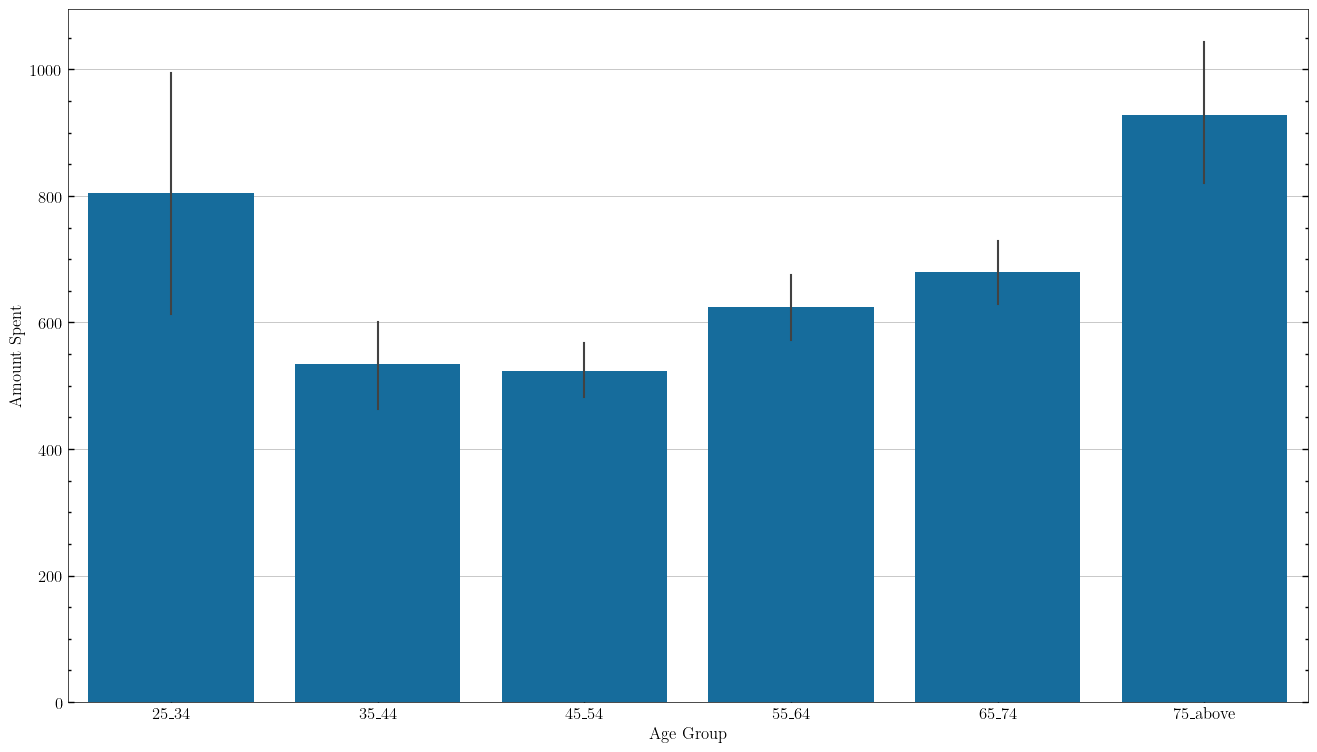

In [27]:
with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/vbars.mplstyle"]):

    bars = sns.barplot(data, x="Age_cat", y="MntSpentTotal")

    bars.set_ylabel("Amount Spent");
    bars.set_xlabel("Age Group");

    plt.show()

In [28]:
grouped = data["MntSpentTotal"].groupby(data["Education"])

temp = grouped.agg(["mean", "median", "std", cdv, "min", "max"])
temp.columns.names = ["MntSpentTotal"]
temp = temp.map(lambda x: f"{x:.2f}")
temp

MntSpentTotal,mean,median,std,cdv,min,max
Education,,,,,,
Basic,81.80,57.00,123.23,150.65,14.00,839.00
Graduation,622.13,415.00,600.25,96.48,5.00,2524.00
2n Cycle,499.49,207.50,538.99,107.91,13.00,2257.00
Master,608.17,380.00,625.82,102.90,10.00,2525.00
PhD,676.64,496.00,616.80,91.16,8.00,2440.00


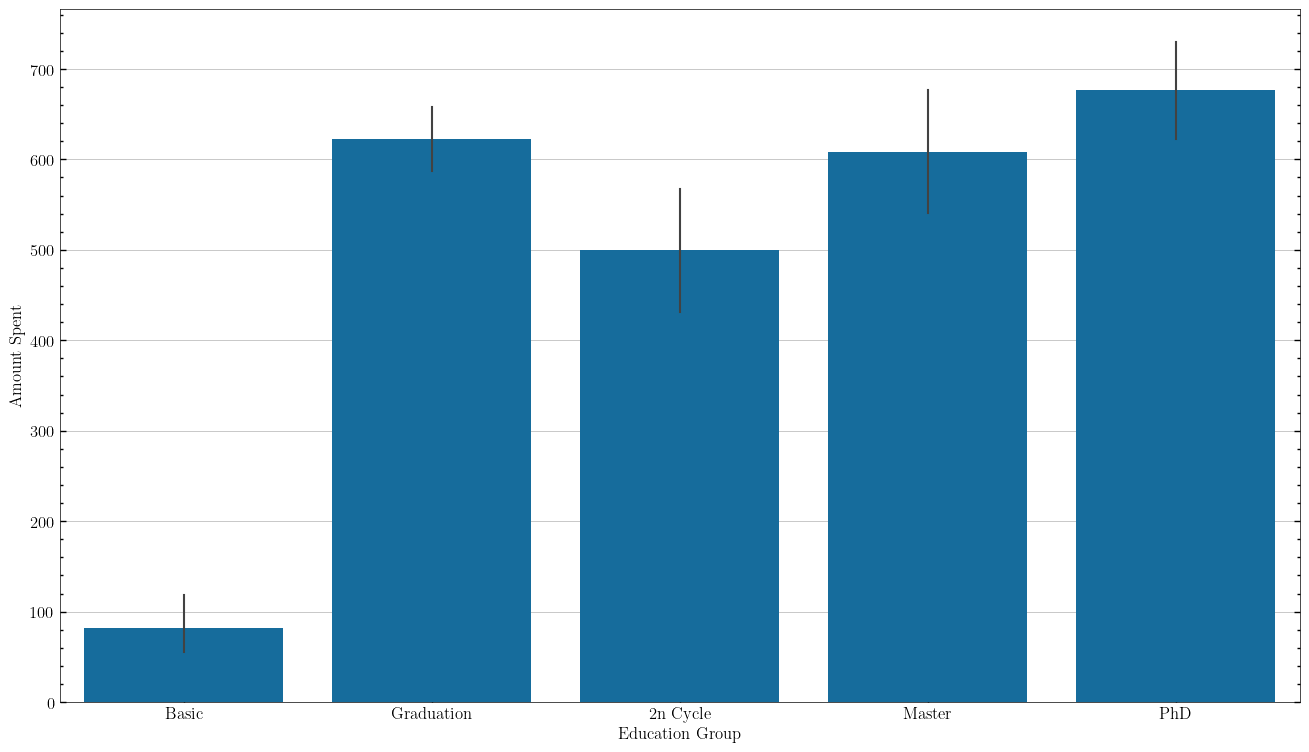

In [29]:
with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/vbars.mplstyle"]):

    bars = sns.barplot(data, x="Education", y="MntSpentTotal")

    bars.set_ylabel("Amount Spent");
    bars.set_xlabel("Education Group");

    plt.show()

In [30]:
grouped = data["MntSpentTotal"].groupby(data["Marital_Status"])

temp = grouped.agg(["mean", "median", "std", cdv, "min", "max"])
temp.columns.names = ["MntSpentTotal"]
temp = temp.map(lambda x: f"{x:.2f}")
temp

MntSpentTotal,mean,median,std,cdv,min,max
Marital_Status,,,,,,
Divorced,612.99,400.00,580.77,94.74,6.00,2074.00
Married,591.46,396.00,591.19,99.95,8.00,2486.00
Single,613.85,369.00,631.38,102.86,5.00,2525.00
Together,607.63,395.00,608.83,100.20,8.00,2524.00
Widow,727.96,625.50,576.90,79.25,15.00,2088.00


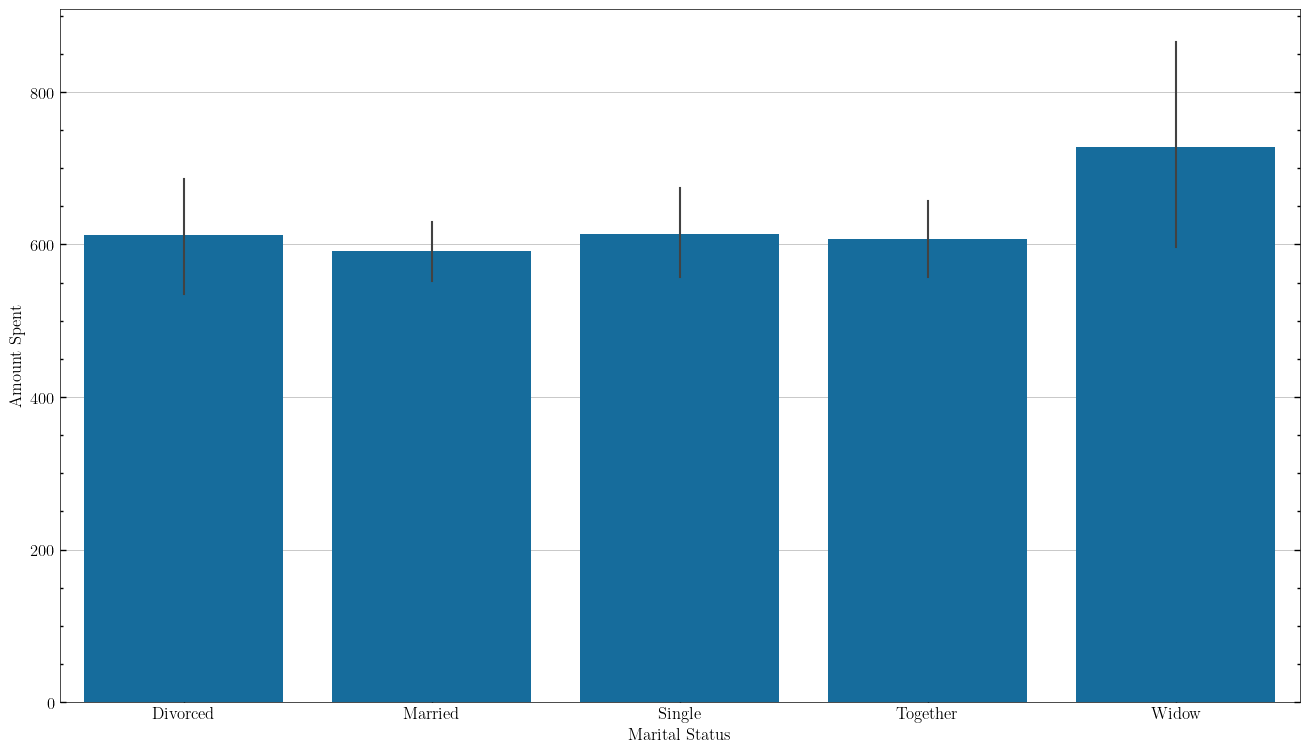

In [31]:
with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/vbars.mplstyle"]):

    bars = sns.barplot(data, x="Marital_Status", y="MntSpentTotal")

    bars.set_ylabel("Amount Spent");
    bars.set_xlabel("Marital Status");

    plt.show()

In [32]:
spent_mnt = ["MntWines", "MntFruits", "MntMeatProducts", 
             "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
grouped = data[spent_mnt].groupby(data["Marital_Status"])

temp = grouped.agg(["mean", "median", "std", cdv, "min", "max"])
temp = temp.map(lambda x: f"{x:.2f}")
temp = temp.T
temp

Marital_Status          Divorced  Married   Single Together    Widow
MntWines         mean     326.19   299.86   291.93   308.15   367.13
                 median   183.00   173.00   156.50   186.00   332.00
                 std      347.25   338.43   334.18   335.66   335.61
                 cdv      106.46   112.86   114.47   108.93    91.41
                 min        0.00     0.00     0.00     0.00     1.00
                 max     1459.00  1493.00  1332.00  1492.00  1462.00
MntFruits        mean      27.52    25.65    27.32    25.31    31.87
                 median     8.00     7.00     9.00     8.00    11.00
                 std       40.26    39.16    40.76    38.61    46.75
                 cdv      146.29   152.69   149.20   152.51   146.69
                 min        0.00     0.00     0.00     0.00     0.00
                 max      172.00   197.00   199.00   185.00   194.00
MntMeatProducts  mean     150.82   160.90   185.23   166.01   185.33
                 median    72.00    64.00    68.00    68.00    83.00
                 std      187.26   226.38   244.86   218.42   215.12
                 cdv      124.16   140.70   132.19   131.57   116.07
                 min        0.00     1.00     1.00     1.00     3.00
                 max      932.00  1725.00   984.00  1725.00   925.00
MntFishProducts  mean      35.16    35.47    38.84    39.00    49.91
                 median    10.00    12.00    13.00    12.00    23.00
                 std       52.44    52.24    55.42    56.99    62.44
                 cdv      149.13   147.30   142.69   146.10   125.12
                 min        0.00     0.00     0.00     0.00     0.00
                 max      225.00   254.00   250.00   258.00   259.00
MntSweetProducts mean      26.92    26.75    27.13    26.21    37.87
                 median     7.00     8.00     9.00     9.00    11.00
                 std       41.34    41.24    40.79    39.77    50.14
                 cdv      153.60   154.15   150.35   151.75   132.42
                 min        0.00     0.00     0.00     0.00     0.00
                 max      189.00   197.00   262.00   196.00   191.00
MntGoldProds     mean      46.38    42.85    43.39    42.94    55.86
                 median    25.00    22.00    26.00    24.00    37.50
                 std       54.67    52.02    50.05    50.41    53.57
                 cdv      117.88   121.40   115.33   117.39    95.90
                 min        0.00     0.00     0.00     0.00     0.00
                 max      242.00   321.00   291.00   241.00   224.00

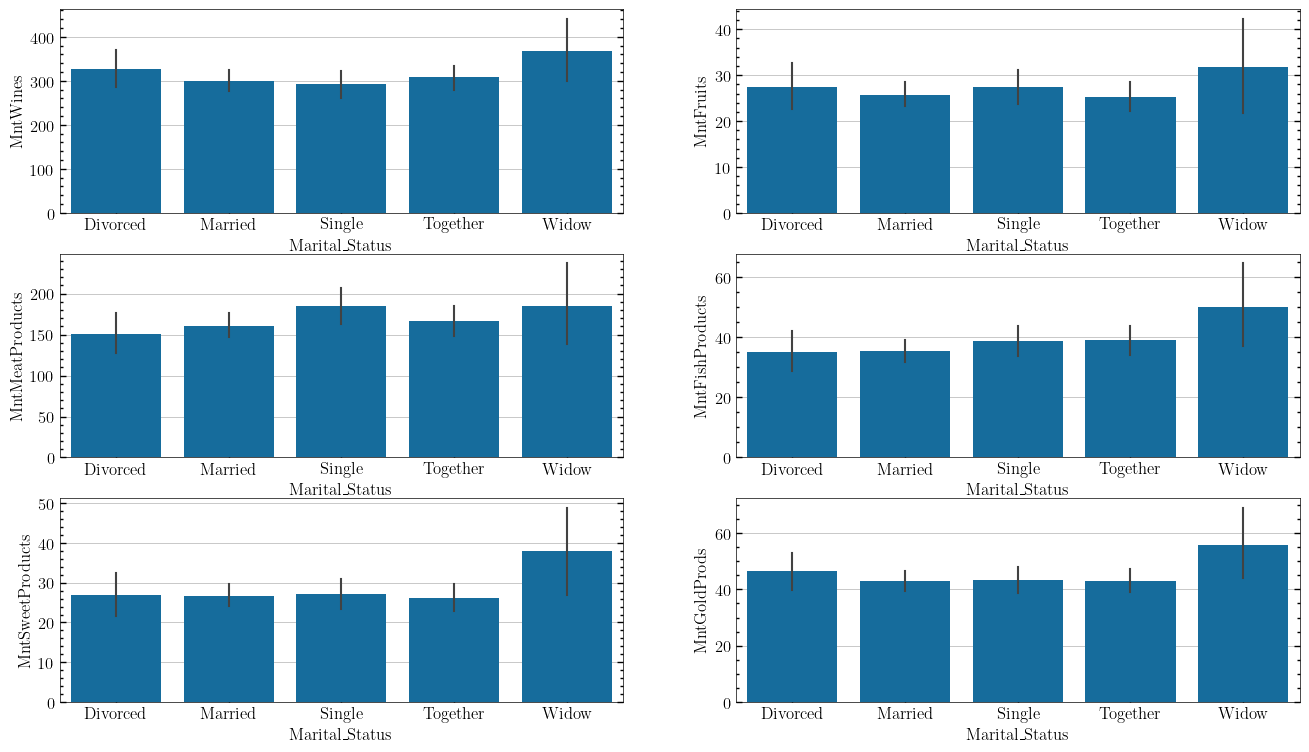

In [33]:
with plt.style.context(["seaborn-v0_8-colorblind",
                   "./mplstyle/basic.mplstyle",
                   "./mplstyle/vbars.mplstyle"]):

    fig, ax =plt.subplots(3,2)

    sns.barplot(ax=ax[0,0], x="Marital_Status", 
                y="MntWines", data=data);
    sns.barplot(ax=ax[0,1], x="Marital_Status", 
                y="MntFruits", data=data);
    sns.barplot(ax=ax[1,0], x="Marital_Status", 
                y="MntMeatProducts", data=data);
    sns.barplot(ax=ax[1,1], x="Marital_Status", 
                y="MntFishProducts", data=data);
    sns.barplot(ax=ax[2,0], x="Marital_Status", 
                y="MntSweetProducts", data=data);
    sns.barplot(ax=ax[2,1], x="Marital_Status", 
                y="MntGoldProds", data=data);

    plt.show()

In [34]:
dataycmp = data[data["AcceptedCmpTotal"] > 0]
datancmp = data[data["AcceptedCmpTotal"] == 0]

results_y = dataycmp[spent_mnt].agg(["mean", "median", "std", 
                                     cdv, "min", "max"])
results_n = datancmp[spent_mnt].agg(["mean", "median", "std", 
                                     cdv, "min", "max"])

temp = pd.merge(results_y.T, results_n.T, 
                on=results_y.columns, suffixes=["_y", "_n"])
#pd.concat(results_y, results_n, axis=1, )
#temp = temp.T
#temp = temp.map(lambda x: f"{x:.2f}")
temp.index = temp["key_0"]
temp = temp[['mean_y', 'mean_n', 'median_y', 'median_n', 'std_y', 'std_n', 
            'cdv_y', 'cdv_n', 'min_y', 'min_n', 'max_y', 'max_n']]
temp.index.names = ["Amount Spent"]
temp.columns.names = ["Results"]
temp = temp.map(lambda x: f"{x:.2f}")
temp

Results,mean_y,mean_n,median_y,median_n,std_y,std_n,cdv_y,cdv_n,min_y,min_n,max_y,max_n
Amount Spent,,,,,,,,,,,,
MntWines,613.20,225.14,603.00,104.00,401.09,265.97,65.41,118.14,0.00,0.00,1493.00,1396.00
MntFruits,36.02,23.80,20.50,7.00,45.02,37.87,124.99,159.09,0.00,0.00,190.00,199.00
MntMeatProducts,287.52,135.82,191.50,51.00,272.40,198.54,94.74,146.18,1.00,0.00,974.00,1725.00
MntFishProducts,54.60,33.13,29.00,11.00,64.52,50.80,118.15,153.35,0.00,0.00,253.00,259.00
MntSweetProducts,39.91,23.75,19.50,7.00,49.07,38.11,122.96,160.46,0.00,0.00,194.00,262.00
MntGoldProds,62.83,38.84,39.00,20.00,58.94,48.23,93.80,124.17,0.00,0.00,242.00,321.00


## Notebook Session

In [35]:
# Notebook info
process = psutil.Process()
memory_used = process.memory_info().rss / (1024 ** 2)  # MB

print(f"\n\tMemory used: {memory_used:.2f} MB\n")

sinfo(
    na=True,
    os=True,
    cpu=False,
    jupyter=True,
    std_lib=True,
)


	Memory used: 250.32 MB

-----
datetime    NA
json        2.0.9
matplotlib  3.8.4
numpy       1.26.4
pandas      2.2.2
pathlib     NA
psutil      6.0.0
scipy       1.14.0
seaborn     0.13.2
sinfo       0.3.1
warnings    NA
-----
IPython             8.26.0
jupyter_client      8.6.2
jupyter_core        5.7.2
-----
Python 3.12.4 | packaged by conda-forge | (main, Jun 17 2024, 10:04:44) [MSC v.1940 64 bit (AMD64)]
Windows-10-10.0.19045-SP0
None
-----
Session information updated at 2024-07-14 19:34
